In [1]:
from init import *


In [2]:

# 2nd Laser


def H_af_2nd_laser(power, pol=0):
    line = "D2"
    intens = get_probe_intensity(power)
    e0 = E_0_plus(intens)
    rab = rabi_D2_vector_component(E_field_component=e0)
    left = 1 / 2 * np.conjugate(rab) * sigma_q(q=pol, line=line)
    right = left.dag()
    return [[left + right, 'cos(delta_p * t)'],
            [1j * (left - right), "sin(delta_p * t)"]]



(<Figure size 1209.6x483.84 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

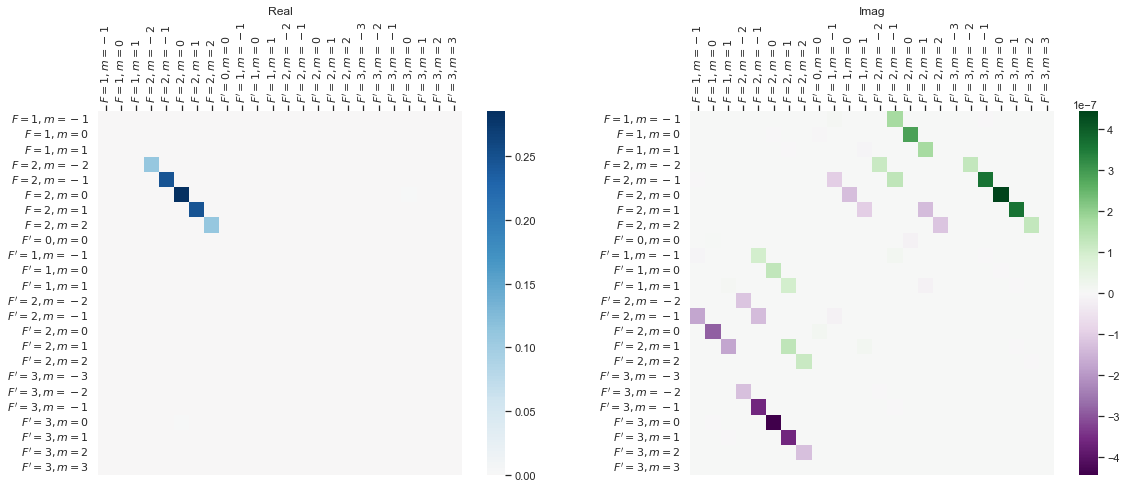

In [3]:
freq1 = (4.271676631815181 - 0.0729112 + 0.03)  # ghz, blue detuned from F=2 -> Fp=2 by 30 MHz
hamil1 = (H_atom_field_D2(0, E_0_plus(get_probe_intensity(1.5e-3))) 
        + H_atom(freq1 * 1e9 * 2 * pi, "D2"))
h = [hamil1] + H_af_2nd_laser(1.5e-3)
rho_ss_1 = steadystate(h[0]+h[1][0], c_op_list=natural_decay_ops_D2())
maplot(rho_ss_1)

10.1%. Run time:  26.76s. Est. time left: 00:00:03:58
20.1%. Run time:  52.15s. Est. time left: 00:00:03:27
30.1%. Run time:  76.62s. Est. time left: 00:00:02:58
40.1%. Run time: 100.98s. Est. time left: 00:00:02:31
50.0%. Run time: 125.15s. Est. time left: 00:00:02:04
60.0%. Run time: 152.23s. Est. time left: 00:00:01:41
70.0%. Run time: 177.16s. Est. time left: 00:00:01:15
80.0%. Run time: 203.49s. Est. time left: 00:00:00:50
90.0%. Run time: 227.79s. Est. time left: 00:00:00:25
Total run time: 251.48s


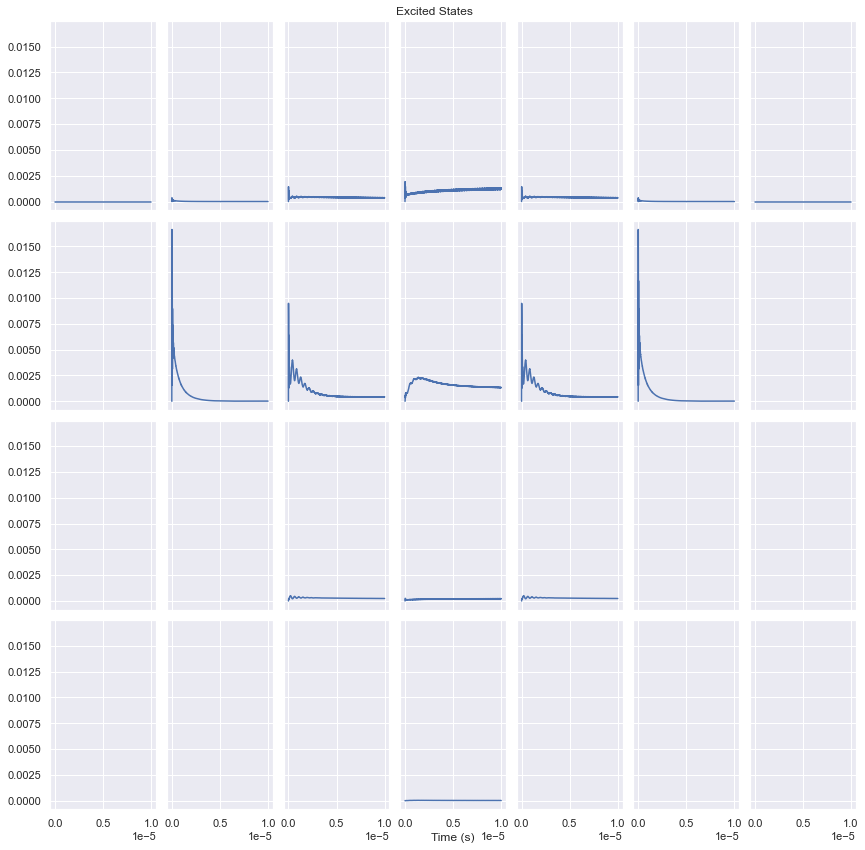

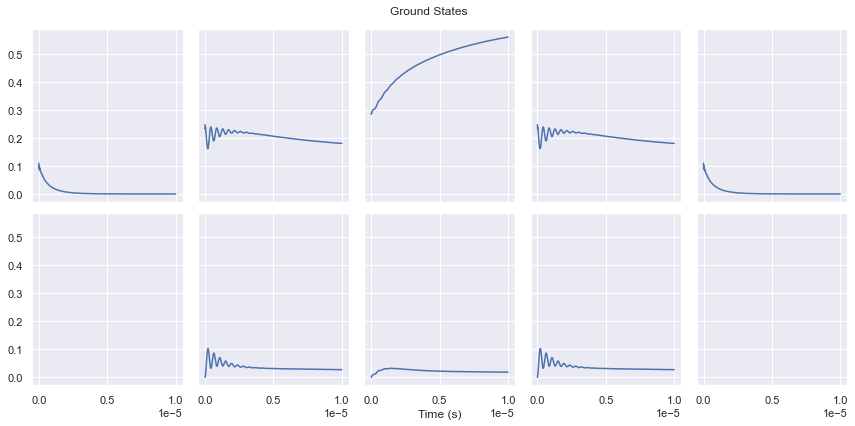

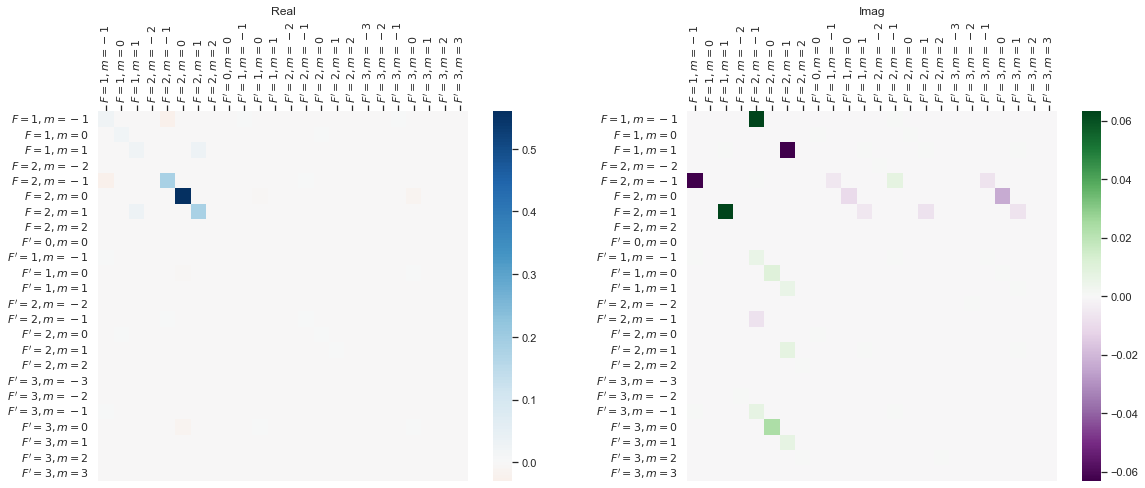

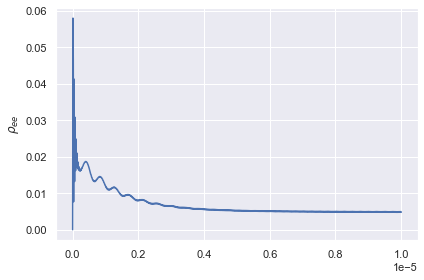

In [4]:
times = np.linspace(0, 1e-5, 1001)
res = mesolve(h,
              rho0=rho_ss_1,
              tlist=times,
              c_ops=natural_decay_ops_D2(),
              args={'delta_p': (-6.834682610904290) * 2e9 * pi},
              options=Options(nsteps=2**2 * 1000),
              progress_bar=True)
plot_excited_states_time(res)
plot_ground_states_time(res)
maplot(res.states[-1])
rho_ee_t = [sum(state.diag()[8:]) for state in res.states]
plt.figure()
plt.plot(times, rho_ee_t)
plt.ylabel(r"$\rho_{ee}$")
plt.tight_layout()

lin pol

In [5]:

# 2nd Laser


def H_af_2nd_laser(power):
    line = "D2"
    intens = get_probe_intensity(power)
    e0 = E_0_plus(intens)
    rab = rabi_D2_vector_component(E_field_component=e0)
    left = 1 / 2 * np.conjugate(rab)/2 * sigma_q(q=1, line=line) + 1 / 2 * np.conjugate(rab)/2 * sigma_q(q=-1, line=line)
    right = left.dag()
    return [[left + right, 'cos(delta_p * t)'],
            [1j * (left - right), "sin(delta_p * t)"]]



(<Figure size 1209.6x483.84 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

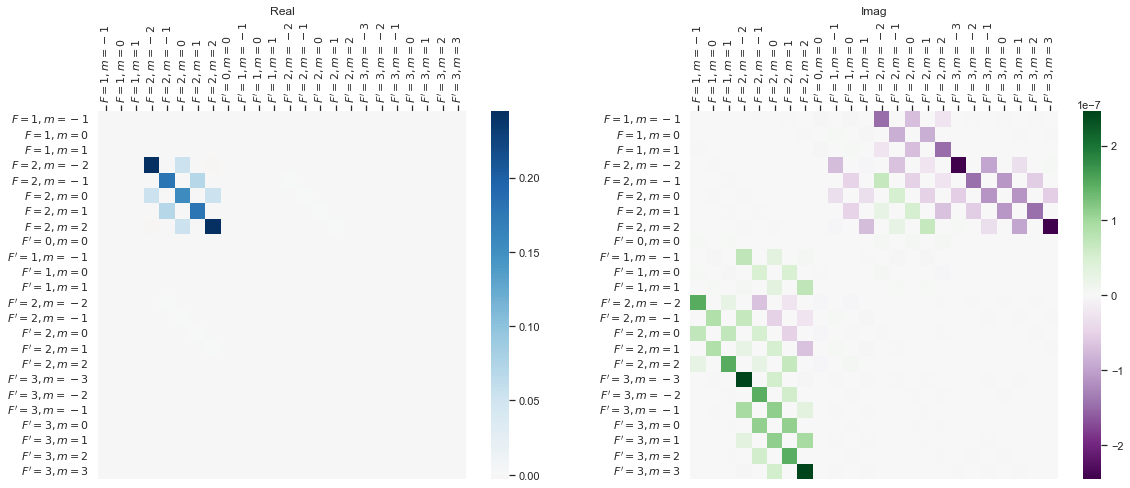

In [6]:
freq1 = (4.271676631815181 - 0.0729112 + 0.03)  # ghz, blue detuned from F=2 -> Fp=2 by 30 MHz
hamil1 = (H_atom_field_D2(-1, E_0_plus(get_probe_intensity(1.5e-3 /2))) +H_atom_field_D2(1, E_0_plus(get_probe_intensity(1.5e-3 /2)))
        + H_atom(freq1 * 1e9 * 2 * pi, "D2"))
h = [hamil1] + H_af_2nd_laser(1.5e-3)
rho_ss_1 = steadystate(h[0]+h[1][0], c_op_list=natural_decay_ops_D2())
maplot(rho_ss_1)

10.1%. Run time:  34.37s. Est. time left: 00:00:05:06
20.1%. Run time:  67.00s. Est. time left: 00:00:04:26
30.1%. Run time:  99.17s. Est. time left: 00:00:03:50
40.1%. Run time: 130.55s. Est. time left: 00:00:03:15
50.0%. Run time: 163.40s. Est. time left: 00:00:02:43
60.0%. Run time: 195.87s. Est. time left: 00:00:02:10
70.0%. Run time: 226.97s. Est. time left: 00:00:01:37
80.0%. Run time: 258.25s. Est. time left: 00:00:01:04
90.0%. Run time: 289.50s. Est. time left: 00:00:00:32
Total run time: 320.72s


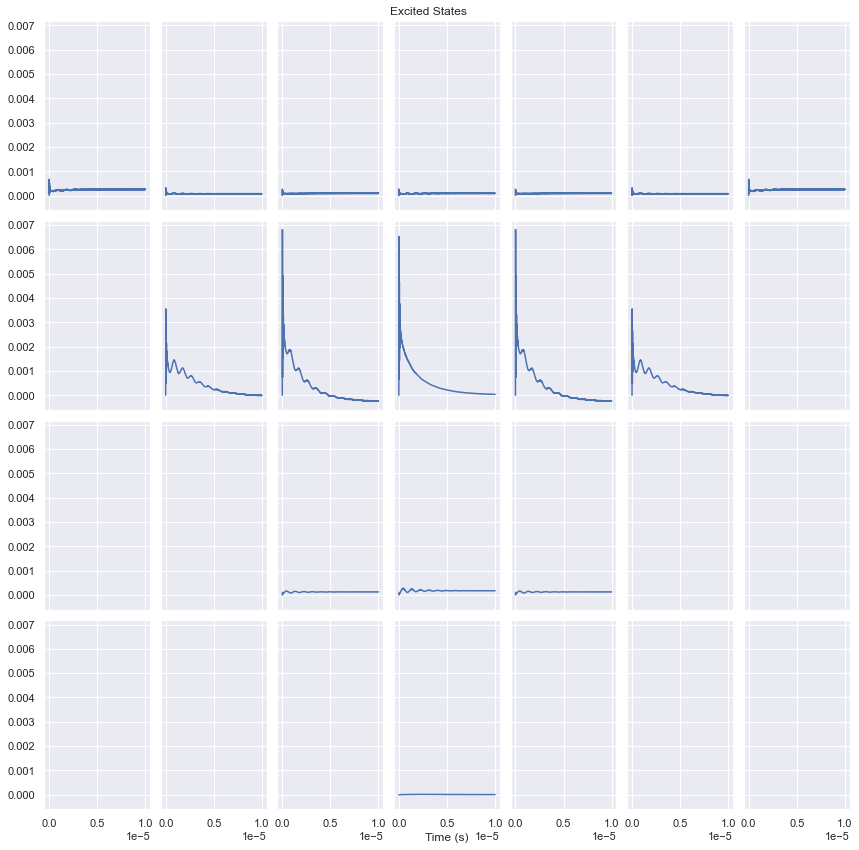

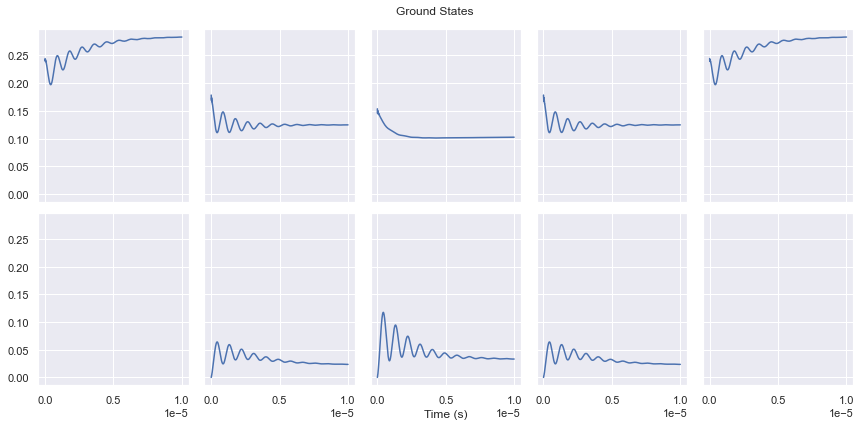

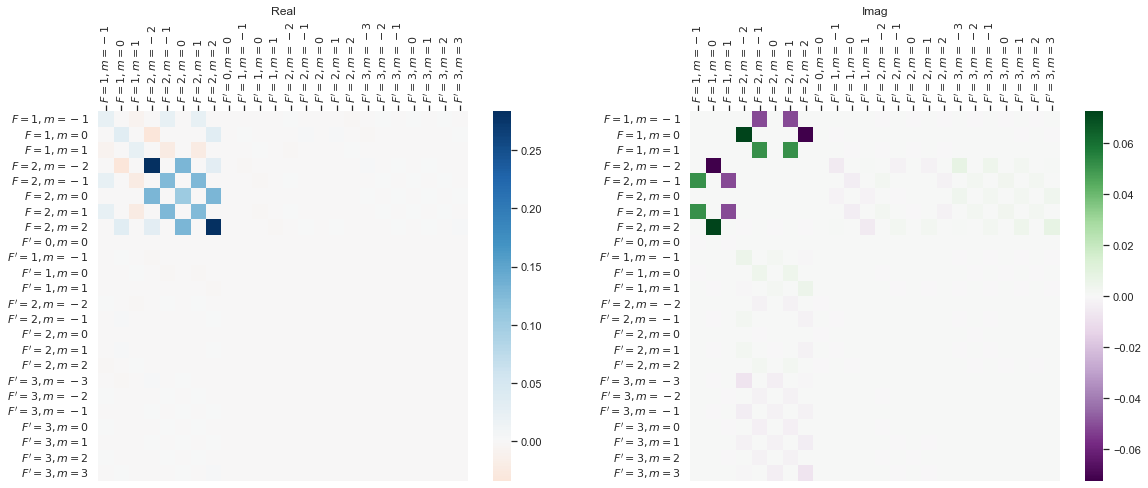

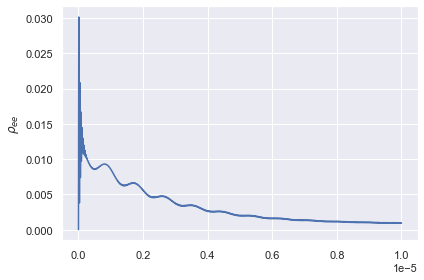

In [7]:
times = np.linspace(0, 1e-5, 1001)
res = mesolve(h,
              rho0=rho_ss_1,
              tlist=times,
              c_ops=natural_decay_ops_D2(),
              args={'delta_p': (-6.834682610904290) * 2e9 * pi},
              options=Options(nsteps=2**2 * 1000),
              progress_bar=True)
plot_excited_states_time(res)
plot_ground_states_time(res)
maplot(res.states[-1])
rho_ee_t = [sum(state.diag()[8:]) for state in res.states]
plt.figure()
plt.plot(times, rho_ee_t)
plt.ylabel(r"$\rho_{ee}$")
plt.tight_layout()
rho_gg_t = [sum(state.diag()[:8]) for state in res.states]
plt.figure()
plt.plot(times, rho_gg_t)
plt.ylabel(r"$\rho_{gg}$")
plt.tight_layout()

10.1%. Run time:  33.27s. Est. time left: 00:00:04:56
20.1%. Run time:  65.47s. Est. time left: 00:00:04:20
30.1%. Run time:  96.94s. Est. time left: 00:00:03:45
40.1%. Run time: 128.56s. Est. time left: 00:00:03:12
50.0%. Run time: 162.24s. Est. time left: 00:00:02:41
60.0%. Run time: 194.98s. Est. time left: 00:00:02:09
70.0%. Run time: 225.16s. Est. time left: 00:00:01:36
80.0%. Run time: 255.98s. Est. time left: 00:00:01:03
90.0%. Run time: 285.32s. Est. time left: 00:00:00:31
Total run time: 314.99s


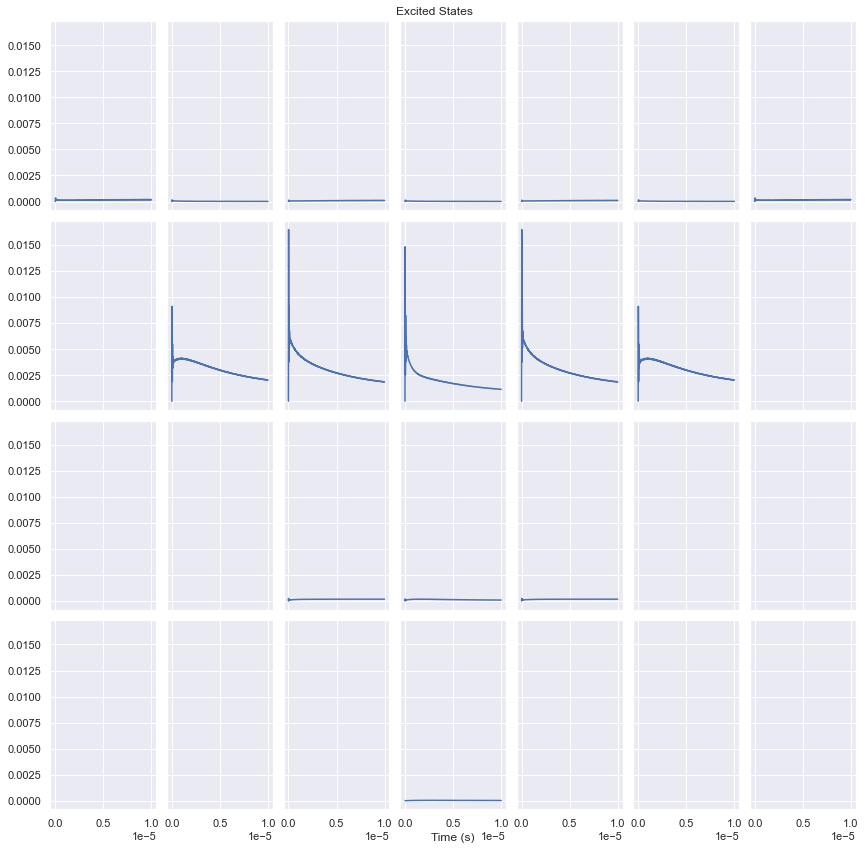

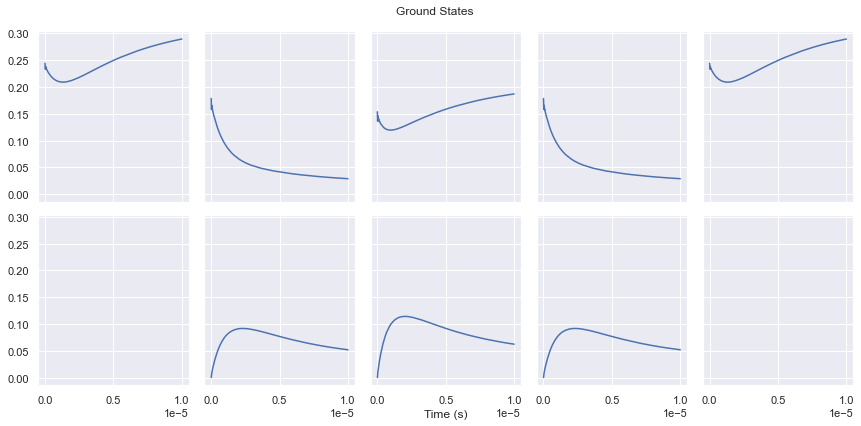

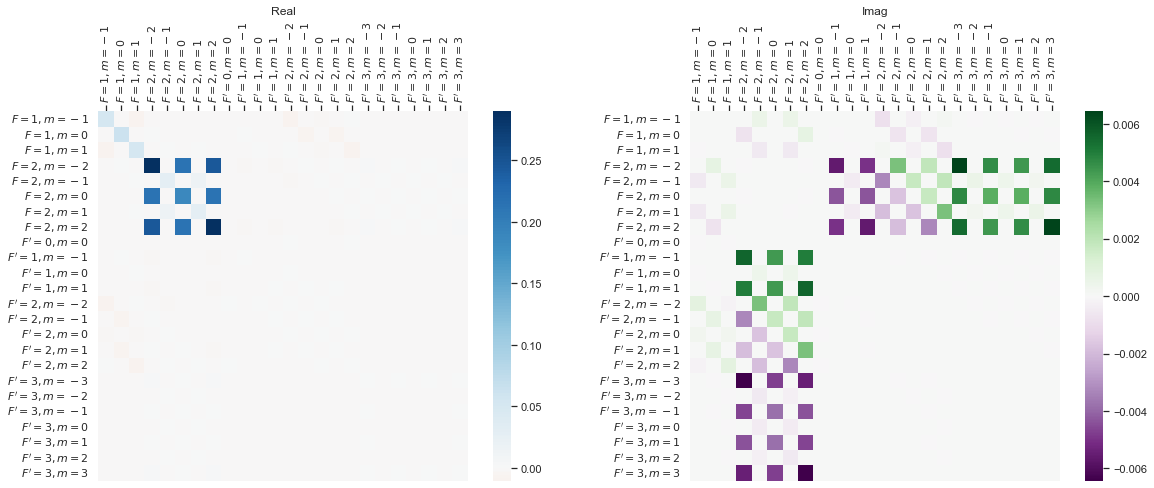

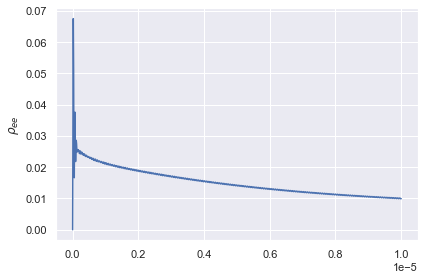

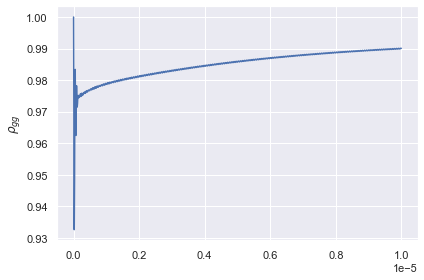

In [10]:
times = np.linspace(0, 1e-5, 1001)
res = mesolve(h,
              rho0=rho_ss_1,
              tlist=times,
              c_ops=natural_decay_ops_D2(),
              args={'delta_p': (-6.834682610904290-0.05) * 2e9 * pi},
              options=Options(nsteps=2**2 * 1000),
              progress_bar=True)
plot_excited_states_time(res)
plot_ground_states_time(res)
maplot(res.states[-1])
rho_ee_t = [sum(state.diag()[8:]) for state in res.states]
plt.figure()
plt.plot(times, rho_ee_t)
plt.ylabel(r"$\rho_{ee}$")
plt.tight_layout()
rho_gg_t = [sum(state.diag()[:8]) for state in res.states]
plt.figure()
plt.plot(times, rho_gg_t)
plt.ylabel(r"$\rho_{gg}$")
plt.tight_layout()

In [11]:
qsave(res, "test")